# ТМО РК2 ИУ5-62Б Кириллова Вариант 9
## Задание
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

 - Метод №1: Метод опорных векторов
 - Метод №2: Случайный лес

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor

In [7]:
#Загрузка датасета
data = pd.read_csv("/houses_to_rent.csv")
data.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [8]:
#Проверка типов данных
data.dtypes

Unnamed: 0         int64
city               int64
area               int64
rooms              int64
bathroom           int64
parking spaces     int64
floor             object
animal            object
furniture         object
hoa               object
rent amount       object
property tax      object
fire insurance    object
total             object
dtype: object

In [9]:
#Размер датасета
data.shape

(6080, 14)

In [10]:
#Проверка пустых значений
data.isnull().sum()

Unnamed: 0        0
city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

In [14]:
# Уберем все остальные стоимости, нас будет интересовать только общая
cols_drop = ['hoa', 'rent amount','property tax', 'fire insurance']
data = data.drop(cols_drop, axis = 1)

In [15]:
#Кодирование категориальных признаков
LE = LabelEncoder()
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = LE.fit_transform(data[col])

In [16]:
#Проверка типов данных
data.dtypes

Unnamed: 0        int64
city              int64
area              int64
rooms             int64
bathroom          int64
parking spaces    int64
floor             int64
animal            int64
furniture         int64
total             int64
dtype: object

In [17]:
data.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total
0,0,1,240,3,3,4,0,0,0,3858
1,1,0,64,2,1,1,2,0,1,235
2,2,1,443,5,5,4,23,0,0,712
3,3,1,73,2,2,1,4,0,1,1142
4,4,1,19,1,1,0,0,1,1,113


<Axes: >

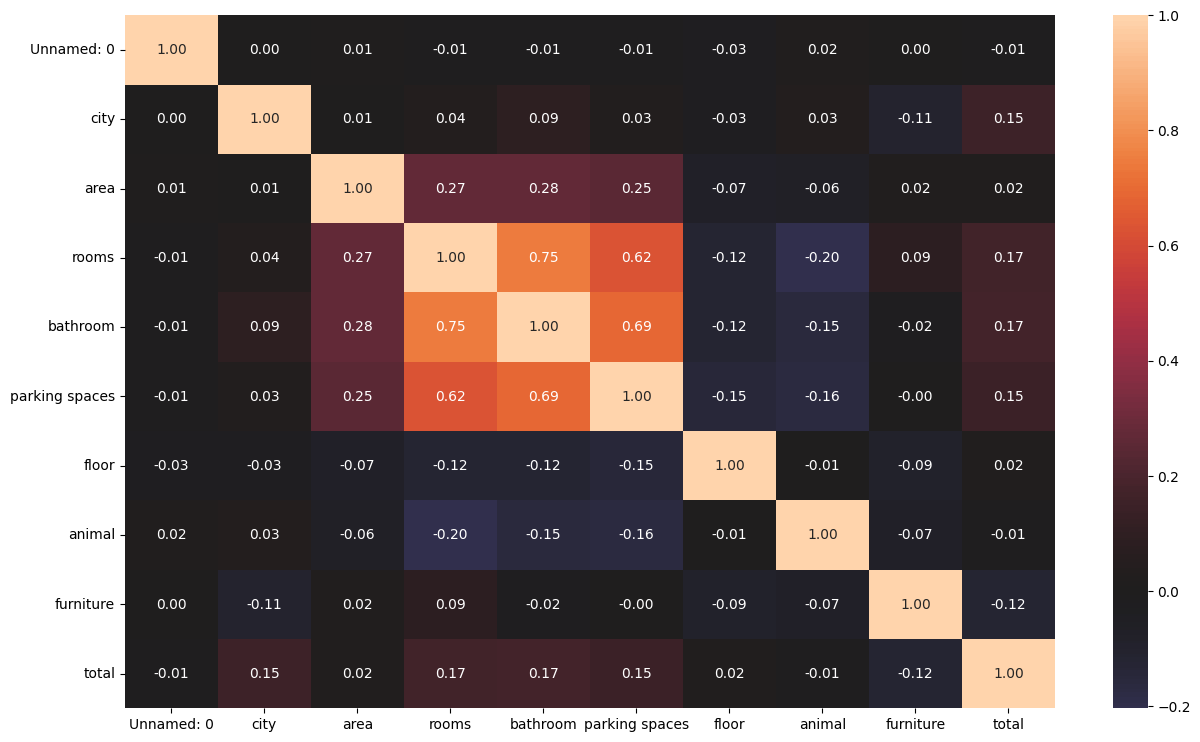

In [18]:
#Построение корреляционной матрицы
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method="pearson"), ax=ax,annot=True, fmt=".2f", center=0)

In [19]:
#Разделение выборки на обучающую и тестовую
target = "total"
xArray = data.drop(target, axis=1)
yArray = data[target]
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

## Метод опорных векторов

In [29]:
SVR1 = SVR() # задача регрессии
SVR1.fit(trainX, trainY)

SVR()

In [30]:
data_y_pred_1 = SVR1.predict(testX)

In [31]:
R2_SVR = r2_score(testY, data_y_pred_1)
MSE_SVR= mean_squared_error(testY, data_y_pred_1)

In [32]:
print("Оценка качества модели с помощью коэффициента детерминации: {}".format(R2_SVR))
print("Средняя квадратичная ошибка: {}".format(MSE_SVR))

Оценка качества модели с помощью коэффициента детерминации: -0.007036257961425596
Средняя квадратичная ошибка: 1372761.8187497


## Случайный лес

In [22]:
RT = RandomForestRegressor(n_estimators=10, random_state=1)
RT.fit(trainX, trainY)

RandomForestRegressor(n_estimators=10, random_state=1)

In [25]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
from sklearn.metrics import r2_score, mean_squared_error

Found existing installation: scikit-learn 1.5.0
Uninstalling scikit-learn-1.5.0:
  Successfully uninstalled scikit-learn-1.5.0
  Using cached scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [26]:
R2_RT = r2_score(testY, RT.predict(testX))
MSE_RT= mean_squared_error(testY, RT.predict(testX))

In [27]:
print("Оценка качества модели с помощью коэффициента детерминации: {}".format(R2_RT))
print("Средняя квадратичная ошибка: {}".format(MSE_RT))

Оценка качества модели с помощью коэффициента детерминации: 0.11441205073971528
Средняя квадратичная ошибка: 1207207.1032976974


В данном случае, можем увидеть, что ансамблевая модель случайного леса предсказывает значения с большей точностью в отличие от метода опорных векторов. Мы видим более низкий показатель MSE и более высокий R2, этот результат можно считать достаточно логичным